# Problem: Which category has the highest probability of having cardiovascular disease

In [1]:
!pip install lightgbm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import seaborn as sb
from matplotlib import rcParams
sb.set()

# Data Preparation

In [2]:
cardiodata = pd.read_csv('cardio_trainedited.csv')
cardiodata.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

# Check Missing Data

In [3]:
cardiodata["cardio"].unique()

array([0, 1], dtype=int64)

In [4]:
len(cardiodata.loc[cardiodata['cardio']==' '])

0

In [5]:
cardiodata["age"].unique()

array([18393, 20228, 18857, ..., 14925, 17727, 17926], dtype=int64)

In [6]:
len(cardiodata.loc[cardiodata['age']==' '])

0

In [7]:
cardiodata["gender"].unique()

array([2, 1], dtype=int64)

In [8]:
len(cardiodata.loc[cardiodata['gender']==' '])

0

In [9]:
cardiodata["cholesterol"].unique()

array([1, 3, 2], dtype=int64)

In [10]:
len(cardiodata.loc[cardiodata['cholesterol']==' '])

0

In [11]:
cardiodata["gluc"].unique()

array([1, 2, 3], dtype=int64)

In [12]:
len(cardiodata.loc[cardiodata['gluc']==' '])

0

In [13]:
cardiodata["smoke"].unique()

array([0, 1], dtype=int64)

In [14]:
len(cardiodata.loc[cardiodata['smoke']==' '])

0

In [15]:
cardiodata["active"].unique()

array([1, 0], dtype=int64)

In [16]:
len(cardiodata.loc[cardiodata['active']==' '])

0

In [17]:
cardiodata["height"].unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57], dtype=int64)

In [18]:
len(cardiodata.loc[cardiodata['height']==' '])

0

In [19]:
cardiodata["weight"].unique()

array([ 62.  ,  85.  ,  64.  ,  82.  ,  56.  ,  67.  ,  93.  ,  95.  ,
        71.  ,  68.  ,  80.  ,  60.  ,  78.  , 112.  ,  75.  ,  52.  ,
        83.  ,  69.  ,  90.  ,  45.  ,  65.  ,  59.  ,  66.  ,  74.  ,
       105.  ,  73.  ,  55.  ,  70.  ,  72.  ,  63.  ,  50.  , 107.  ,
        84.  ,  77.  ,  79.  ,  76.  ,  58.  , 115.  ,  97.  ,  53.  ,
        57.  ,  49.  , 110.  ,  94.  ,  92.  ,  87.  , 103.  ,  88.  ,
        99.  , 100.  ,  61.  ,  48.  ,  54.  ,  51.  ,  47.  ,  91.  ,
       104.  ,  81.  ,  98.  , 108.  ,  89.  , 101.  ,  86.  ,  65.5 ,
       142.  ,  96.  ,  44.  ,  41.  , 169.  , 116.  , 200.  ,  64.8 ,
       120.  , 117.  , 125.  , 106.  , 114.  , 113.  , 129.  , 124.  ,
        42.  , 123.  , 111.  , 102.  , 109.  ,  46.  , 139.  , 150.  ,
       138.  , 131.  ,  43.  ,  83.6 , 134.  , 106.5 , 121.  ,  40.  ,
       141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,  62.3 , 118.  ,
        89.5 , 132.  , 155.  , 130.  , 159.  ,  84.6 , 140.  ,  82.3 ,
      

In [20]:
len(cardiodata.loc[cardiodata['weight']==' '])

0

In [21]:
cardiodata["ap_hi"].unique()

array([  110,   140,   130,   150,   100,   120,   145,   170,   135,
         125,    90,   180,   160,   133,   190,    80,   122,   169,
         126,   158,   200,    14,   123,    70,   161,   147,   115,
         137,   153,    11,   148,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   116,    10,   121,    16,   112,   159,
         113,   118,   155,   142,   131,   157,   136,   146,   138,
        -100,   909,   109,    85,   106,   129,    93,     7,    95,
         179,   156,   168,   132,   104,   103,   178,   175,   128,
         151,    15,   139, 11500,   127,    17,   108,   144,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [22]:
len(cardiodata.loc[cardiodata['ap_hi']==' '])

0

In [23]:
cardiodata["ap_lo"].unique()

array([   80,    90,    70,   100,    60,    85,    89,   110,    65,
          63,    79,  1100,  1000,   800,   120,    50,    30,   109,
          84,  1033,   150,    91,    40,    73,    78,    75,    86,
          87,  1001,    82,    95,    69,    74,    97,    81,  1200,
          83,   119,     0,    93,   105, 10000,    99,    77,    59,
        8044,   140,    92,  1044,   108,   125,   115,    68,    61,
         106,   102,    94,    66,    52,   170,    76,   160,    62,
          96,   130,   113,    67,  9100,    10,    88,   902,     8,
         112,   104,    71,    72,  1008,    98,  2088,    20,   802,
        8000,  1022,   850,   708,    57,   101,  9011,  1011,    64,
        1007,  1177,  7100,    45,   709,  8500,    58,  1110,  8099,
        1088,   126,  1077,  1120,     7,   103,  1125,   180,   121,
        8100,   710,  5700,  8079,  1111,  1003,     6,  1900,   809,
         114,   801,  1002,    53,   111,     1,   118,    56,   182,
         810,     9,

In [24]:
len(cardiodata.loc[cardiodata['ap_lo']==' '])

0

In [25]:
cardiodata_clean = cardiodata.copy()

cardiodata_clean.rename(columns = {'#': '0'}, inplace = True)

cardiodata_clean.columns = cardiodata_clean.columns.str.upper()

cardiodata_clean.columns = cardiodata_clean.columns.str.replace(".","")
cardiodata_clean.columns = cardiodata_clean.columns.str.replace(" ","_")

cardiodata_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           70000 non-null  int64  
 1   AGE          70000 non-null  int64  
 2   GENDER       70000 non-null  int64  
 3   HEIGHT       70000 non-null  int64  
 4   WEIGHT       70000 non-null  float64
 5   AP_HI        70000 non-null  int64  
 6   AP_LO        70000 non-null  int64  
 7   CHOLESTEROL  70000 non-null  int64  
 8   GLUC         70000 non-null  int64  
 9   SMOKE        70000 non-null  int64  
 10  ALCO         70000 non-null  int64  
 11  ACTIVE       70000 non-null  int64  
 12  CARDIO       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


<ipython-input-25-4686ec5483e3>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cardiodata_clean.columns = cardiodata_clean.columns.str.replace(".","")


# Data Cleaning

# Filter Unusual and Abnormal Data

In [26]:
cardiodata = cardiodata.loc[(cardiodata["ap_hi"] >= 40) & (cardiodata["ap_hi"] <= 180) ]

In [27]:
cardiodata = cardiodata.loc[(cardiodata["ap_lo"] >= 40) & (cardiodata["ap_lo"] <= 120) ]

In [28]:
cardiodata = cardiodata.loc[(cardiodata["weight"] >= 54.6) & (cardiodata["height"] <= 200) 
             & (cardiodata["height"] >= 100) & (cardiodata["weight"] <= 120) ]

# Add BMI calculated by height and weight

In [29]:
cardiodata['BMI']=round(cardiodata['weight']/((cardiodata['height']/100)**2),2)

In [30]:
cardiodata["BMI"].unique()

array([21.97, 34.93, 23.51, ..., 22.52, 55.46, 19.23])

In [31]:
cardiodata['BMI'].describe()

count    64653.000000
mean        27.665178
std          4.859137
min         14.580000
25%         24.090000
50%         26.580000
75%         30.390000
max         86.780000
Name: BMI, dtype: float64

<AxesSubplot:>

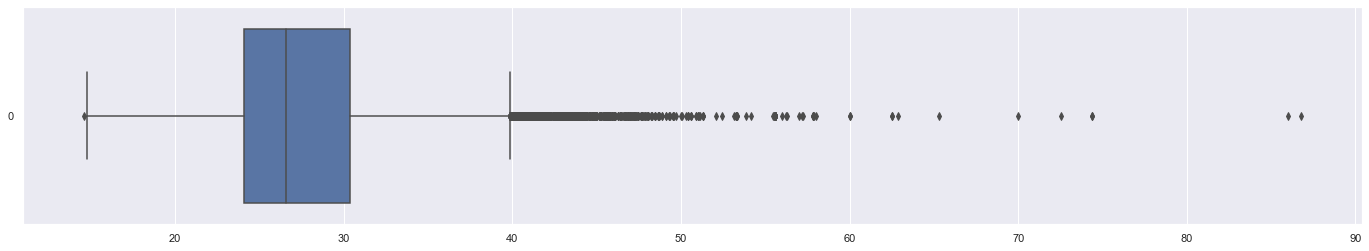

In [32]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = cardiodata['BMI'], orient = "h")

# Clean Unusual Data in BMI

In [33]:
cardiodata = cardiodata.loc[(cardiodata["BMI"] <= 40)]

In [34]:
cardiodata['BMI'].describe()

count    63305.000000
mean        27.328960
std          4.279283
min         14.580000
25%         24.060000
50%         26.470000
75%         30.060000
max         40.000000
Name: BMI, dtype: float64

<AxesSubplot:>

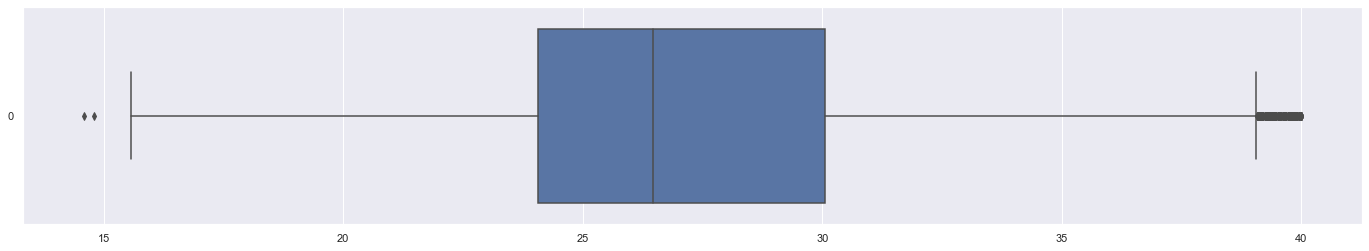

In [35]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = cardiodata['BMI'], orient = "h")

# Convert object/categorical data to numerical data: One Hot Encoding

In [36]:
cardiodata.shape

(63305, 14)

In [37]:
cardiodata['cholesterol']=cardiodata['cholesterol'].map({1:"chol_Normal", 2:"chol_Ab_Normal", 3:"chol_High"})
cardiodata['gluc']=cardiodata['gluc'].map({1:"gluc_Normal", 2:"gluc_Ab_Normal", 3:"gluc_High"})
gluc=cardiodata['gluc']
chol=cardiodata['cholesterol']
d1=pd.DataFrame(pd.get_dummies(chol))
d2=pd.DataFrame(pd.get_dummies(gluc))

cardiodata=pd.concat([cardiodata,d1,d2],axis=1)
cardiodata.tail()

id    age  gender  height  weight  ap_hi  ap_lo     cholesterol  \
69994  99992  21074       1     165    80.0    150     80     chol_Normal   
69995  99993  19240       2     168    76.0    120     80     chol_Normal   
69997  99996  19066       2     183   105.0    180     90       chol_High   
69998  99998  22431       1     163    72.0    135     80     chol_Normal   
69999  99999  20540       1     170    72.0    120     80  chol_Ab_Normal   

                 gluc  smoke  alco  active  cardio    BMI  chol_Ab_Normal  \
69994     gluc_Normal      0     0       1       1  29.38               0   
69995     gluc_Normal      1     0       1       0  26.93               0   
69997     gluc_Normal      0     1       0       1  31.35               0   
69998  gluc_Ab_Normal      0     0       0       1  27.10               0   
69999     gluc_Normal      0     0       1       0  24.91               1   

       chol_High  chol_Normal  gluc_Ab_Normal  gluc_High  gluc_Normal  
69994          0            1               0          0            1  
69995          0            1               0          0            1  
69997          1            0               0          0            1  
69998          0            1               1          0            0  
69999          0            0               0          0            1

In [38]:
cardiodata.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol         gluc  \
0   0  18393       2     168    62.0    110     80  chol_Normal  gluc_Normal   
1   1  20228       1     156    85.0    140     90    chol_High  gluc_Normal   
2   2  18857       1     165    64.0    130     70    chol_High  gluc_Normal   
3   3  17623       2     169    82.0    150    100  chol_Normal  gluc_Normal   
4   4  17474       1     156    56.0    100     60  chol_Normal  gluc_Normal   

   smoke  alco  active  cardio    BMI  chol_Ab_Normal  chol_High  chol_Normal  \
0      0     0       1       0  21.97               0          0            1   
1      0     0       1       1  34.93               0          1            0   
2      0     0       0       1  23.51               0          1            0   
3      0     0       1       1  28.71               0          0            1   
4      0     0       0       0  23.01               0          0            1   

   gluc_Ab_Normal  gluc_High  gluc_Normal  
0               0          0            1  
1               0          0            1  
2               0          0            1  
3               0          0            1  
4               0          0            1

In [39]:
cardiodata.shape

(63305, 20)

# Convert unit of ‘age’ to year


In [40]:
cardiodata['age'] = (cardiodata['age'] / 365).round().astype('int') 
cardiodata.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol         gluc  \
0   0   50       2     168    62.0    110     80  chol_Normal  gluc_Normal   
1   1   55       1     156    85.0    140     90    chol_High  gluc_Normal   
2   2   52       1     165    64.0    130     70    chol_High  gluc_Normal   
3   3   48       2     169    82.0    150    100  chol_Normal  gluc_Normal   
4   4   48       1     156    56.0    100     60  chol_Normal  gluc_Normal   

   smoke  alco  active  cardio    BMI  chol_Ab_Normal  chol_High  chol_Normal  \
0      0     0       1       0  21.97               0          0            1   
1      0     0       1       1  34.93               0          1            0   
2      0     0       0       1  23.51               0          1            0   
3      0     0       1       1  28.71               0          0            1   
4      0     0       0       0  23.01               0          0            1   

   gluc_Ab_Normal  gluc_High  gluc_Normal  
0               0          0            1  
1               0          0            1  
2               0          0            1  
3               0          0            1  
4               0          0            1

In [41]:
cardiodata['age'].unique()

array([50, 55, 52, 48, 60, 61, 62, 54, 41, 40, 46, 58, 59, 63, 64, 57, 56,
       49, 51, 44, 65, 53, 47, 39, 42, 43, 45, 30])

<AxesSubplot:xlabel='age', ylabel='count'>

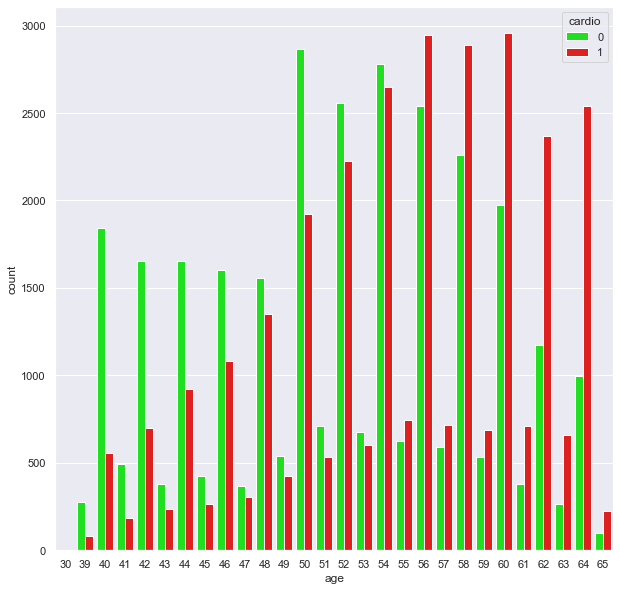

In [42]:
rcParams['figure.figsize'] = 10,10
sb.countplot(x = 'age',hue='cardio',data = cardiodata, palette=('#00FF00',"#FF0000"))

# Convert Data Type of Age and BMI : Numeric to Category
age between 35 and 45 = Category 1
age between 45 and 55 = Category 2
age between 55 and 65 = Category 3

bmi between 14 and 23 = category 1
bmi between 24 and 32 = category 2
bmi between 33 and 40 = category 3


In [43]:
a = list('123')
bins = pd.IntervalIndex.from_tuples([ (35, 45), (45, 55), (55, np.max(cardiodata["age"]) + 1)], closed='left')
cardiodata['age'] = np.array(a)[pd.cut(cardiodata["age"], bins = bins).cat.codes]
cardiodata.head()

id age  gender  height  weight  ap_hi  ap_lo  cholesterol         gluc  \
0   0   2       2     168    62.0    110     80  chol_Normal  gluc_Normal   
1   1   3       1     156    85.0    140     90    chol_High  gluc_Normal   
2   2   2       1     165    64.0    130     70    chol_High  gluc_Normal   
3   3   2       2     169    82.0    150    100  chol_Normal  gluc_Normal   
4   4   2       1     156    56.0    100     60  chol_Normal  gluc_Normal   

   smoke  alco  active  cardio    BMI  chol_Ab_Normal  chol_High  chol_Normal  \
0      0     0       1       0  21.97               0          0            1   
1      0     0       1       1  34.93               0          1            0   
2      0     0       0       1  23.51               0          1            0   
3      0     0       1       1  28.71               0          0            1   
4      0     0       0       0  23.01               0          0            1   

   gluc_Ab_Normal  gluc_High  gluc_Normal  
0               0          0            1  
1               0          0            1  
2               0          0            1  
3               0          0            1  
4               0          0            1

In [44]:
b = list('123')
bins = pd.IntervalIndex.from_tuples([ (14, 24), (24, 33), (33, np.max(cardiodata["BMI"]) + 1)], closed='left')
cardiodata['BMI'] = np.array(b)[pd.cut(cardiodata["BMI"], bins = bins).cat.codes]
cardiodata.head()

id age  gender  height  weight  ap_hi  ap_lo  cholesterol         gluc  \
0   0   2       2     168    62.0    110     80  chol_Normal  gluc_Normal   
1   1   3       1     156    85.0    140     90    chol_High  gluc_Normal   
2   2   2       1     165    64.0    130     70    chol_High  gluc_Normal   
3   3   2       2     169    82.0    150    100  chol_Normal  gluc_Normal   
4   4   2       1     156    56.0    100     60  chol_Normal  gluc_Normal   

   smoke  alco  active  cardio BMI  chol_Ab_Normal  chol_High  chol_Normal  \
0      0     0       1       0   1               0          0            1   
1      0     0       1       1   3               0          1            0   
2      0     0       0       1   1               0          1            0   
3      0     0       1       1   2               0          0            1   
4      0     0       0       0   1               0          0            1   

   gluc_Ab_Normal  gluc_High  gluc_Normal  
0               0          0            1  
1               0          0            1  
2               0          0            1  
3               0          0            1  
4               0          0            1

# Visualisation of Data


In [45]:
cardiodata.head()

id age  gender  height  weight  ap_hi  ap_lo  cholesterol         gluc  \
0   0   2       2     168    62.0    110     80  chol_Normal  gluc_Normal   
1   1   3       1     156    85.0    140     90    chol_High  gluc_Normal   
2   2   2       1     165    64.0    130     70    chol_High  gluc_Normal   
3   3   2       2     169    82.0    150    100  chol_Normal  gluc_Normal   
4   4   2       1     156    56.0    100     60  chol_Normal  gluc_Normal   

   smoke  alco  active  cardio BMI  chol_Ab_Normal  chol_High  chol_Normal  \
0      0     0       1       0   1               0          0            1   
1      0     0       1       1   3               0          1            0   
2      0     0       0       1   1               0          1            0   
3      0     0       1       1   2               0          0            1   
4      0     0       0       0   1               0          0            1   

   gluc_Ab_Normal  gluc_High  gluc_Normal  
0               0          0            1  
1               0          0            1  
2               0          0            1  
3               0          0            1  
4               0          0            1

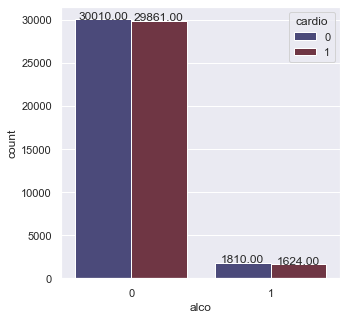

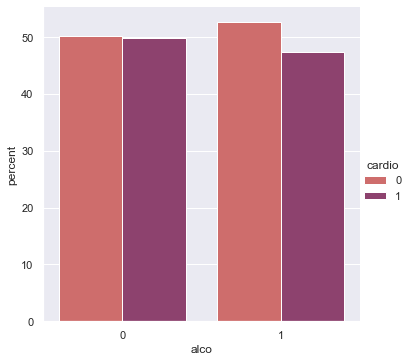

In [46]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
rcParams['figure.figsize'] = 5, 5
alco = cardiodata["alco"]
cardio = cardiodata["cardio"]
ax = sb.countplot(x=alco, hue=cardio, data=cardiodata,palette=("icefire"))

df = cardiodata
x,y = 'alco', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare"),))

show_values_on_bars(ax)

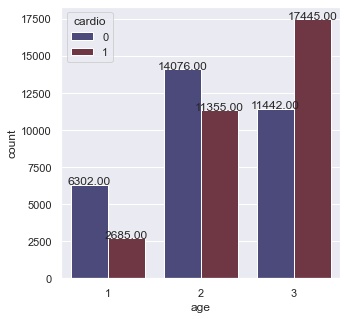

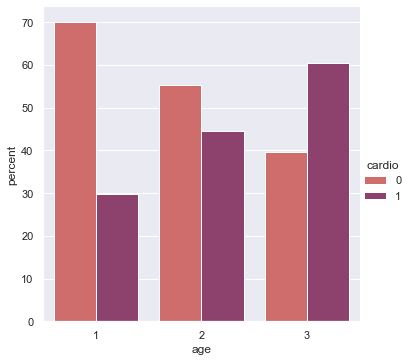

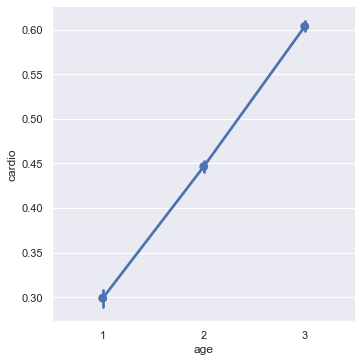

In [47]:
age = cardiodata["age"]
#bx = sb.countplot(x="age", hue="cardio", data=cardiodata)
bx=sb.countplot(x = 'age',
             hue="cardio",
              data = cardiodata,
             order = cardiodata['age'].value_counts().index[::-1]
             ,palette=("icefire"))
df = cardiodata
x,y = 'age', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
ay=sb.catplot(x="age", y="cardio",kind="point", data=cardiodata,order = cardiodata['age'].value_counts().index[::-1])
show_values_on_bars(bx)

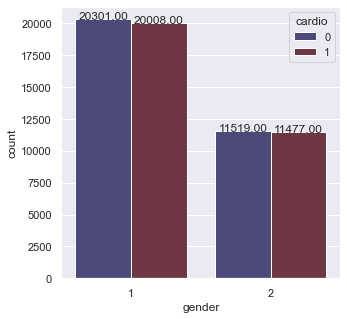

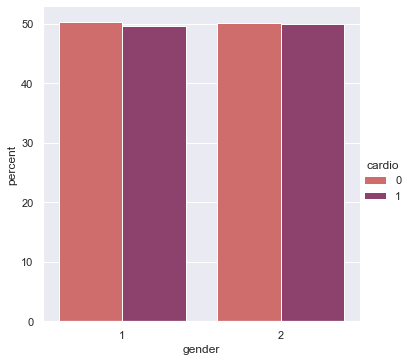

In [48]:
gender = cardiodata["gender"]
cx = sb.countplot(x="gender", hue="cardio", data=cardiodata,palette=("icefire"))
df = cardiodata
x,y = 'gender', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
show_values_on_bars(cx)

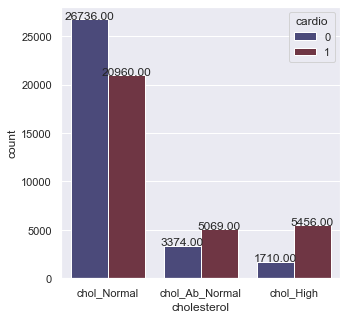

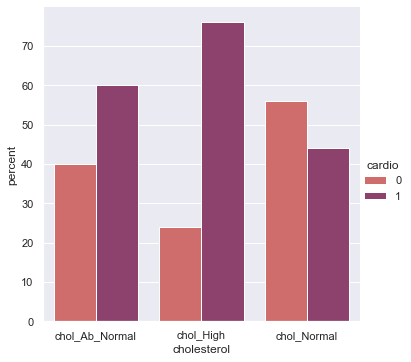

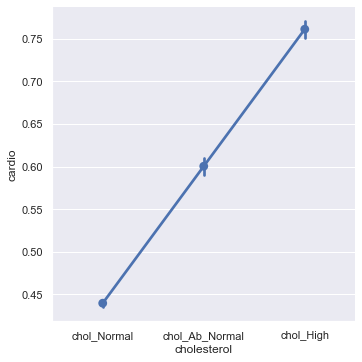

In [49]:
cholesterol = cardiodata["cholesterol"]
dx = sb.countplot(x='cholesterol' , hue="cardio", data=cardiodata,order=['chol_Normal', 'chol_Ab_Normal','chol_High'],palette=("icefire"))
df = cardiodata
x,y = 'cholesterol', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
dy=sb.catplot(x="cholesterol", y="cardio",kind="point", data=cardiodata,order = ['chol_Normal', 'chol_Ab_Normal','chol_High'])
show_values_on_bars(dx)

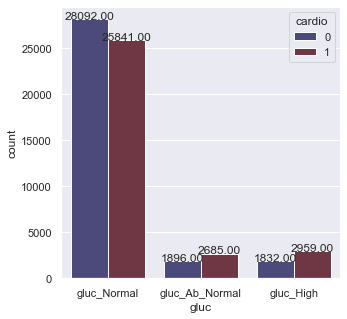

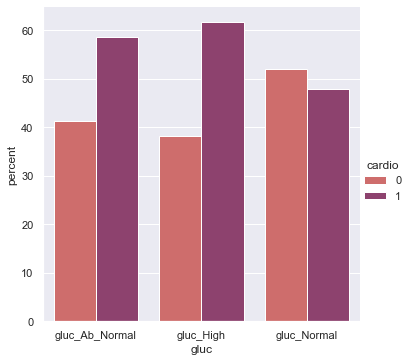

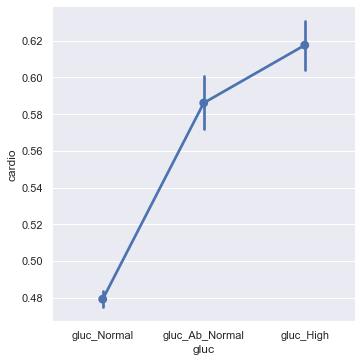

In [50]:
gluc = cardiodata["gluc"]
ex = sb.countplot(x="gluc", hue="cardio", data=cardiodata, order=['gluc_Normal', 'gluc_Ab_Normal','gluc_High'],palette=("icefire"))
df = cardiodata
x,y = 'gluc', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
dy=sb.catplot(x="gluc", y="cardio",kind="point", data=cardiodata,order=['gluc_Normal', 'gluc_Ab_Normal','gluc_High'])
show_values_on_bars(ex)

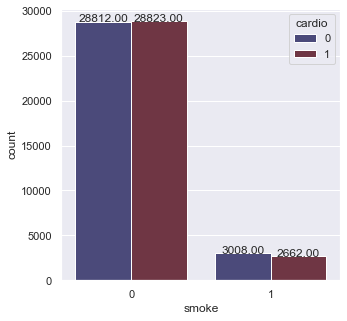

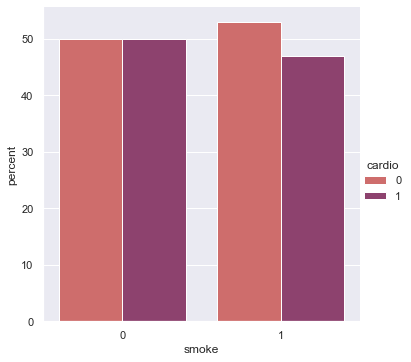

In [51]:
smoke = cardiodata["smoke"]
fx = sb.countplot(x="smoke", hue="cardio", data=cardiodata,palette=("icefire"))
df = cardiodata
x,y = 'smoke', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
show_values_on_bars(fx)

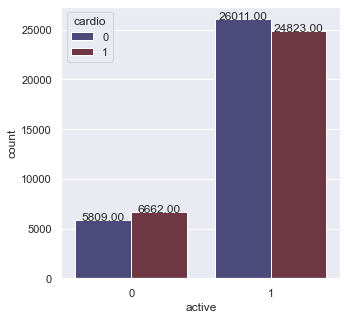

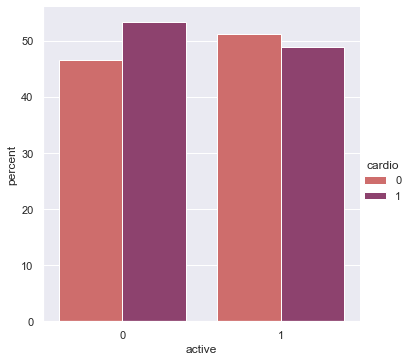

In [52]:
active = cardiodata["active"]
gx = sb.countplot(x="active", hue="cardio", data=cardiodata,palette=("icefire"))
df = cardiodata
x,y = 'active', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
show_values_on_bars(gx)

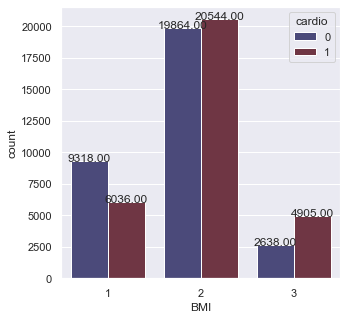

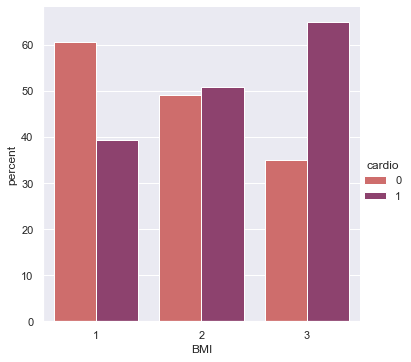

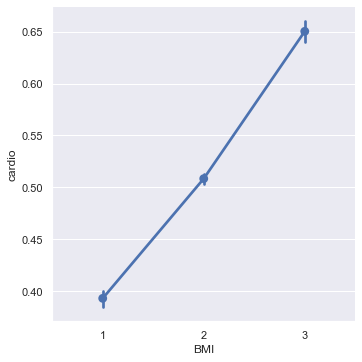

In [53]:
BMI = cardiodata["BMI"]
#bx = sb.countplot(x="age", hue="cardio", data=cardiodata)
bx=sb.countplot(x = 'BMI',
             hue="cardio",
              data = cardiodata,
             order = ['1','2','3'],
             palette=("icefire"))
df = cardiodata
x,y = 'BMI', 'cardio'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette=("flare")))
ay=sb.catplot(x="BMI", y="cardio",kind="point", data=cardiodata,order = ['1','2','3'])
show_values_on_bars(bx)



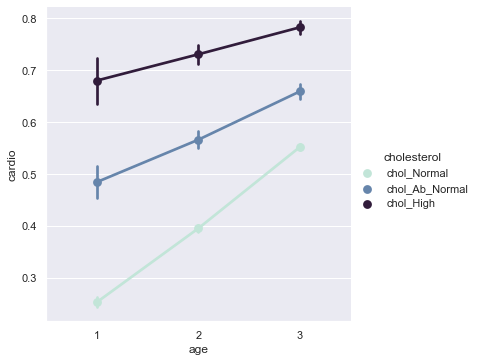

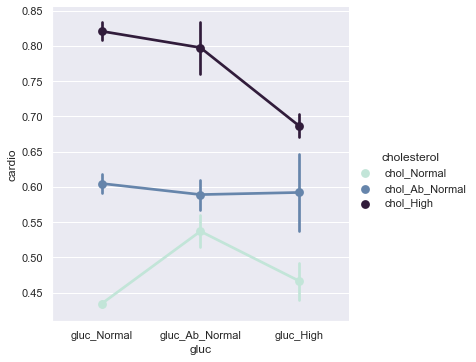

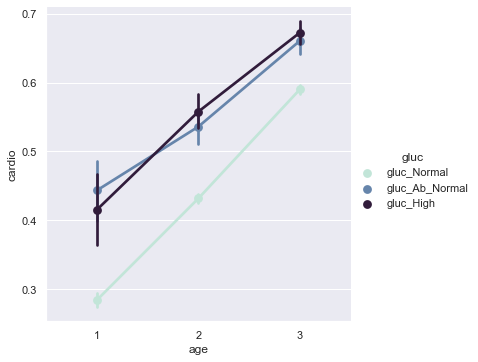

In [54]:
ay=sb.catplot(x="age", y="cardio",hue="cholesterol",kind="point", data=cardiodata,order = cardiodata['age'].value_counts().index[::-1]
             ,hue_order = ['chol_Normal', 'chol_Ab_Normal','chol_High'],palette=("ch:s=.5,rot=-.5"))
ay=sb.catplot(x="gluc", y="cardio",hue="cholesterol",kind="point", data=cardiodata,order=['gluc_Normal', 'gluc_Ab_Normal','gluc_High']
             ,hue_order = ['chol_Normal', 'chol_Ab_Normal','chol_High'],palette=("ch:s=.5,rot=-.5"))
ay=sb.catplot(x="age", y="cardio",hue="gluc",kind="point", data=cardiodata,order = cardiodata['age'].value_counts().index[::-1]
             ,palette=("ch:s=.5,rot=-.5"))


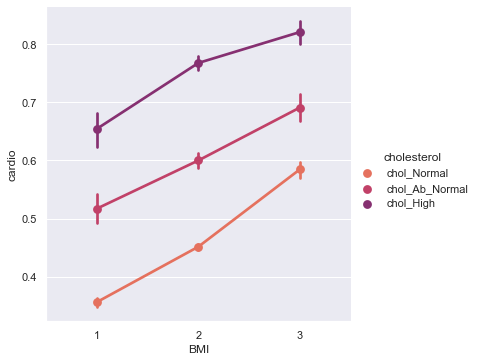

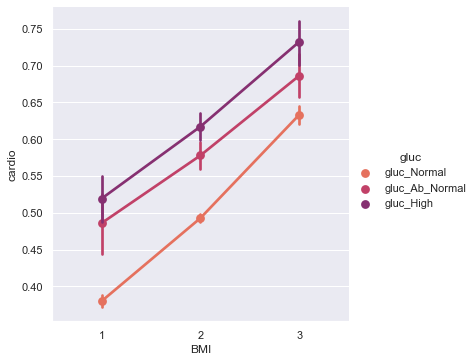

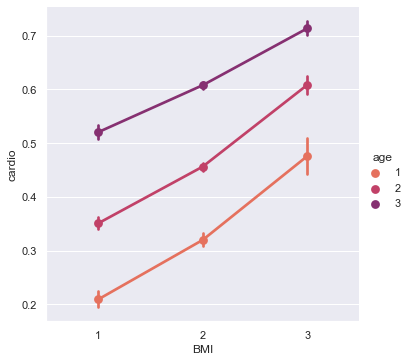

In [55]:
ay=sb.catplot(x="BMI", y="cardio",hue="cholesterol",kind="point", data=cardiodata,order = ['1','2','3']
             ,hue_order = ['chol_Normal', 'chol_Ab_Normal','chol_High'],palette=("flare"))
ay=sb.catplot(x="BMI", y="cardio",hue="gluc",kind="point", data=cardiodata,order = ['1','2','3'],palette=("flare"))
ay=sb.catplot(x="BMI", y="cardio",hue="age",kind="point", data=cardiodata,order = ['1','2','3']
             ,hue_order = ['1','2','3'],palette=("flare"))

# Preparing Data Set by Extracting Data Suitable

In [56]:
cardiodata = cardiodata.drop(['cholesterol','gluc','id'],axis=1)

In [57]:
cardiodata['age'] = pd.to_numeric(cardiodata['age'])
cardiodata['BMI'] = pd.to_numeric(cardiodata['BMI'])
cardiodata['chol_High']= pd.to_numeric(cardiodata['chol_High'])
cardiodata['chol_Normal']= pd.to_numeric(cardiodata['chol_Normal'])
cardiodata['chol_Ab_Normal']= pd.to_numeric(cardiodata['chol_Ab_Normal'])
cardiodata['gluc_High']= pd.to_numeric(cardiodata['gluc_High'])
cardiodata['gluc_Normal']= pd.to_numeric(cardiodata['gluc_Normal'])
cardiodata['gluc_Ab_Normal']= pd.to_numeric(cardiodata['gluc_Ab_Normal'])
age= pd.to_numeric(age)

In [58]:
cardiodata.dtypes


age                 int64
gender              int64
height              int64
weight            float64
ap_hi               int64
ap_lo               int64
smoke               int64
alco                int64
active              int64
cardio              int64
BMI                 int64
chol_Ab_Normal      uint8
chol_High           uint8
chol_Normal         uint8
gluc_Ab_Normal      uint8
gluc_High           uint8
gluc_Normal         uint8
dtype: object

In [59]:
cardiodata = cardiodata.astype({'chol_High':'int64','chol_Normal':'int64','chol_Ab_Normal':'int64',
                                'gluc_High':'int64','gluc_Ab_Normal':'int64','gluc_Normal':'int64'})

In [60]:
cardiodata.dtypes

age                 int64
gender              int64
height              int64
weight            float64
ap_hi               int64
ap_lo               int64
smoke               int64
alco                int64
active              int64
cardio              int64
BMI                 int64
chol_Ab_Normal      int64
chol_High           int64
chol_Normal         int64
gluc_Ab_Normal      int64
gluc_High           int64
gluc_Normal         int64
dtype: object

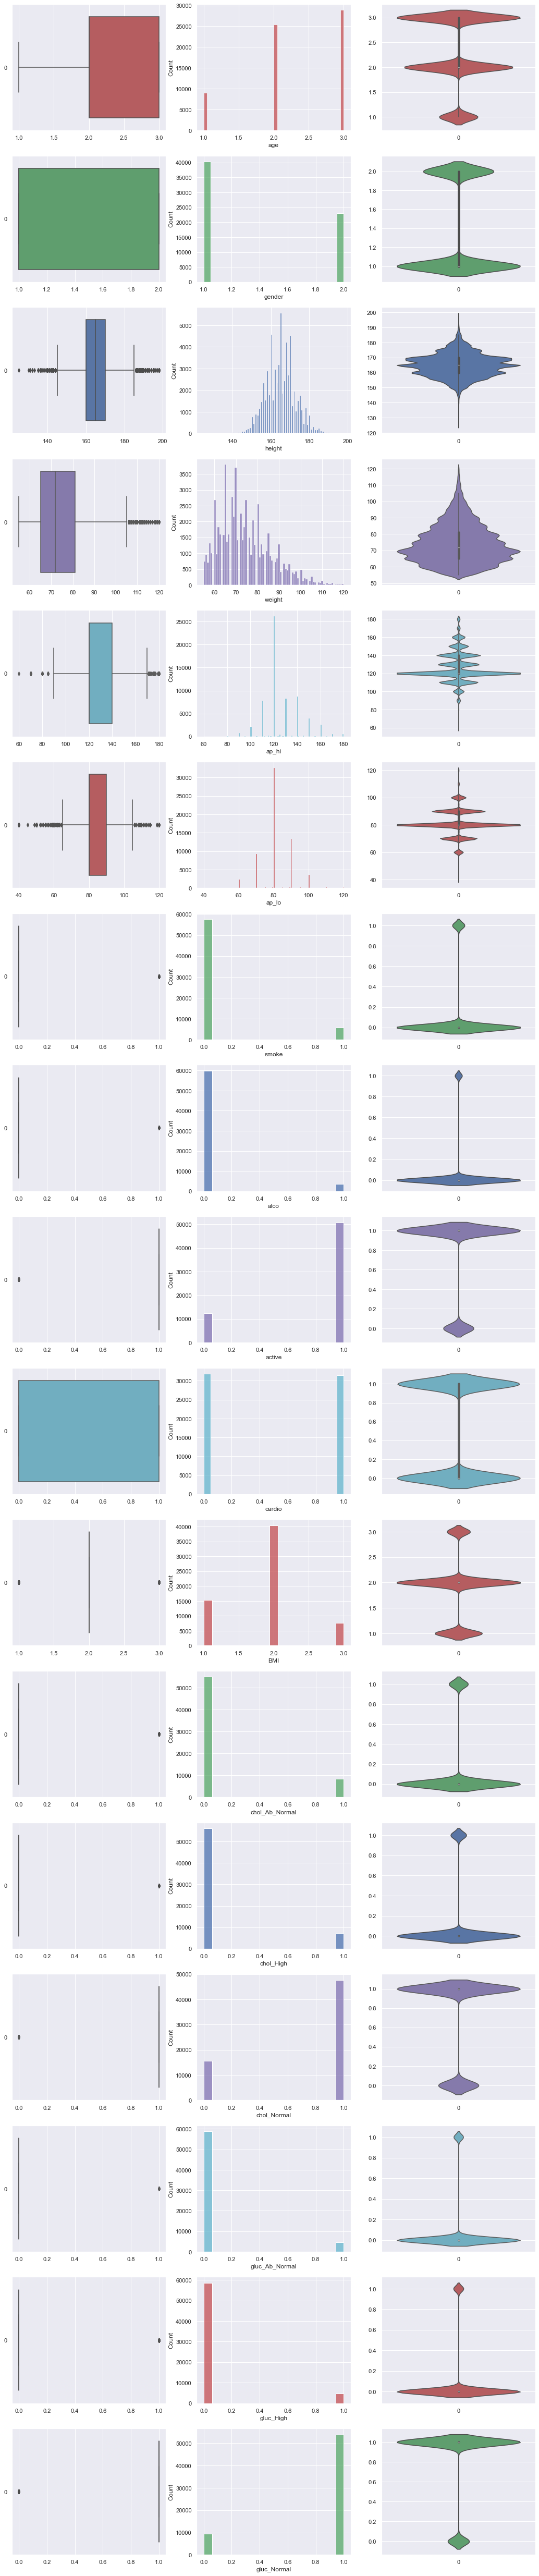

In [61]:
f, axes = plt.subplots(17, 3, figsize=(18, 90))
colors = ["r", "g", "b", "m", "c","r", "g", "b", "m", "c","r", "g", "b", "m", "c","r", "g", "b", "m", "c","r", "g", "b", "m", "c"]

count = 0
for var in cardiodata:
    sb.boxplot(data=cardiodata[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=cardiodata[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=cardiodata[var], color = colors[count], ax = axes[count,2])
    count += 1

# Machine Learning Application

In [62]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn.linear_model as sk
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_recall_fscore_support

In [63]:

x = pd.concat([cardiodata['age'], cardiodata['BMI'],cardiodata['alco'],cardiodata['active'],cardiodata['chol_Normal'],
               cardiodata['chol_Ab_Normal'],cardiodata['chol_High'],cardiodata['gluc_Normal'],cardiodata['gluc_Ab_Normal'],
               cardiodata['gluc_High']], axis = 1).reindex(cardiodata['age'].index)


y = cardiodata['cardio']

In [64]:
y.shape

(63305,)

In [65]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(x,y,random_state=100)


In [66]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [67]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'LightGBM' :  LGBMClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'ExtraTree' : ExtraTreesClassifier()
}
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(train_x,train_y)
    pred = func.predict(test_x)
    results.loc[method]= [100*np.round(accuracy_score(test_y,pred),decimals=4),
                         round(f1_score(test_y,pred),2)]
results

C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy in %  F1-score
Logistic Regression              62.49      0.62
Decision Tree                    62.33      0.63
Random Forest                    62.34      0.63
Support Vector Machines          62.05      0.62
K-nearest Neighbors              55.65      0.45
XGBoost                          62.36      0.63
Gradient Boosting                62.54      0.63
LightGBM                         62.49      0.63
AdaBoost                         62.50      0.62
ExtraTree                        62.32      0.63

In [68]:
model_lr = LogisticRegression()
model_lr.fit(train_x, train_y)

y_pred_lr = model_lr.predict(test_x)
y_pred_lr_train = model_lr.predict(train_x)
lr_test_as = metrics.accuracy_score(y_pred_lr, test_y)
lr_train_as = metrics.accuracy_score(y_pred_lr_train, train_y)
print(f"Logistic Regression test data(accuracy) score  {lr_test_as}")
print(f"Logistic Regression train data(accuracy) score  {lr_train_as}")
print(classification_report(test_y,y_pred_lr))

Logistic Regression test data(accuracy) score  0.6249447147279965
Logistic Regression train data(accuracy) score  0.6312186696996503
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      7952
           1       0.62      0.63      0.62      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



In [69]:
model_k_neighbors = KNeighborsClassifier()
model_k_neighbors.fit(train_x, train_y)

y_pred_k_neighbors = model_k_neighbors.predict(test_x)
y_pred_k_neighbors_train = model_k_neighbors.predict(train_x)
k_neighbors_test_as = metrics.accuracy_score(y_pred_k_neighbors, test_y)
k_neighbors_train_as = metrics.accuracy_score(y_pred_k_neighbors_train, train_y)
print(f"KNeighbors test data(accuracy) score  {k_neighbors_test_as}")
print(f"KNeighbors train data(accuracy) score  {k_neighbors_train_as}")
print(classification_report(test_y,y_pred_k_neighbors))

KNeighbors test data(accuracy) score  0.5565173437796171
KNeighbors train data(accuracy) score  0.5656725220101942
              precision    recall  f1-score   support

           0       0.54      0.75      0.63      7952
           1       0.59      0.36      0.45      7875

    accuracy                           0.56     15827
   macro avg       0.57      0.56      0.54     15827
weighted avg       0.57      0.56      0.54     15827



# Decision Tree Classifier

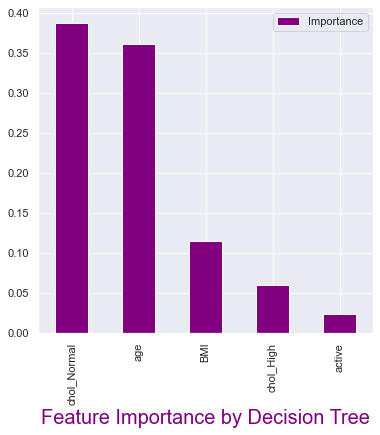

In [70]:
feature_importance = pd.DataFrame({'Importance' : DecisionTreeClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'purple', figsize = (6, 6))
plt.xlabel("Feature Importance by Decision Tree", color = "purple", fontdict= {"fontsize" : 20});

In [71]:
model_dec_tree = DecisionTreeClassifier()
model_dec_tree.fit(train_x, train_y)

y_pred_dec_tree = model_dec_tree.predict(test_x)
y_pred_dec_tree_train = model_dec_tree.predict(train_x)
dec_tree_test_as = metrics.accuracy_score(y_pred_dec_tree, test_y)
dec_tree_train_as = metrics.accuracy_score(y_pred_dec_tree_train, train_y)
print(f"Decision Tree Classifier test data(accuracy) score  {dec_tree_test_as}")
print(f"Decision Tree Classifier train data(accuracy) score  {dec_tree_train_as}")
print(classification_report(test_y,y_pred_dec_tree))

Decision Tree Classifier test data(accuracy) score  0.6233019523598913
Decision Tree Classifier train data(accuracy) score  0.6348203378406841
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



# Random Forest Classifier

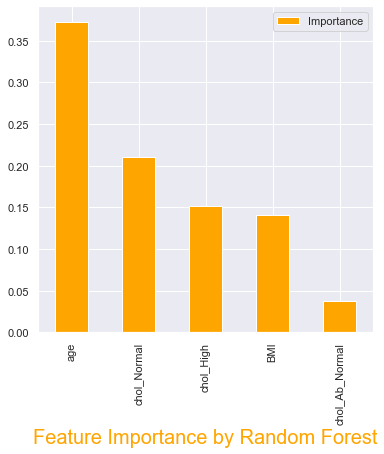

In [72]:
feature_importance = pd.DataFrame({'Importance' : RandomForestClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'orange', figsize = (6, 6))
plt.xlabel("Feature Importance by Random Forest", color = "orange", fontdict= {"fontsize" : 20});

In [73]:
model_ran_forest = RandomForestClassifier()
model_ran_forest.fit(train_x, train_y)

y_pred_ran_forest = model_ran_forest.predict(test_x)
y_pred_ran_forest_train = model_ran_forest.predict(train_x)
ran_forest_test_as = metrics.accuracy_score(y_pred_ran_forest, test_y)
ran_forest_train_as = metrics.accuracy_score(y_pred_ran_forest_train, train_y)
print(f"Random Forest test data(accuracy) score  {ran_forest_test_as}")
print(f"Random Forest train data(accuracy) score  {ran_forest_train_as}")
print(classification_report(test_y,y_pred_ran_forest))

Random Forest test data(accuracy) score  0.6235546850319075
Random Forest train data(accuracy) score  0.6348203378406841
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



# XGB Classifier

[23:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\USER\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


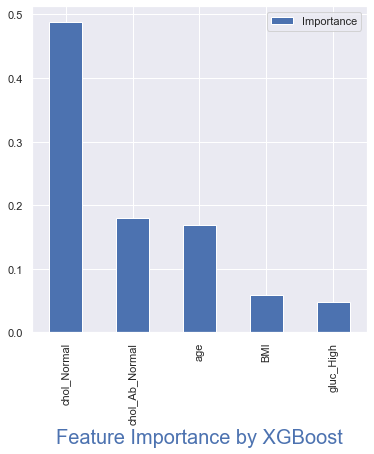

In [74]:
feature_importance = pd.DataFrame({'Importance' : XGBClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'b', figsize = (6, 6))
plt.xlabel("Feature Importance by XGBoost", color = "b", fontdict= {"fontsize" : 20});

In [75]:
model_xgb = XGBClassifier()
model_xgb.fit(train_x, train_y)

y_pred_xgb = model_xgb.predict(test_x)
y_pred_xgb_train = model_xgb.predict(train_x)
xgb_test_as = metrics.accuracy_score(y_pred_xgb, test_y)
xgb_train_as = metrics.accuracy_score(y_pred_xgb_train, train_y)
print(f"XGB test data(accuracy) score  {xgb_test_as}")
print(f"XGB train data(accuracy) score  {xgb_train_as}")
print(classification_report(test_y,y_pred_xgb))

[23:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB test data(accuracy) score  0.6236178681999115
XGB train data(accuracy) score  0.6348203378406841
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



# Gradient Boosting Classifier

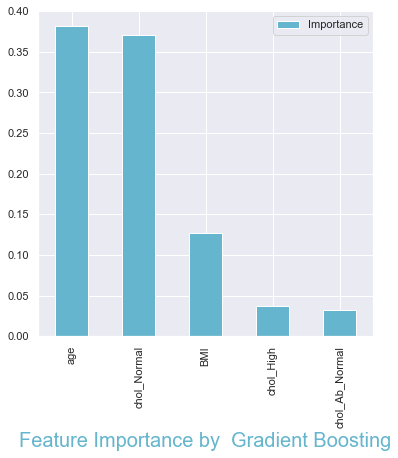

In [76]:
feature_importance = pd.DataFrame({'Importance' : GradientBoostingClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'c', figsize = (6, 6))
plt.xlabel("Feature Importance by  Gradient Boosting", color = "c", fontdict= {"fontsize" : 20});

In [77]:
model_grad_boost = GradientBoostingClassifier()
model_grad_boost.fit(train_x, train_y)

y_pred_grad_boost = model_grad_boost.predict(test_x)
y_pred_grad_boost_train = model_grad_boost.predict(train_x)
grad_boost_test_as = metrics.accuracy_score(y_pred_grad_boost, test_y)
grad_boost_train_as = metrics.accuracy_score(y_pred_grad_boost_train, train_y)
print(f" Gradient Boosting test data(accuracy) score  {grad_boost_test_as}")
print(f" Gradient Boosting train data(accuracy) score  {grad_boost_train_as}")
print(classification_report(test_y,y_pred_grad_boost))

 Gradient Boosting test data(accuracy) score  0.6253869969040248
 Gradient Boosting train data(accuracy) score  0.6332406588314587
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.63     15827
   macro avg       0.63      0.63      0.63     15827
weighted avg       0.63      0.63      0.63     15827



# LGBM Classifier

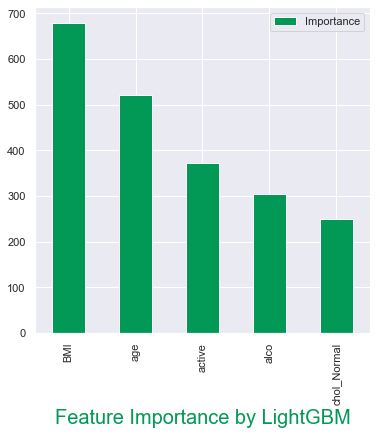

In [78]:
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (6, 6))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});

In [79]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(train_x, train_y)

y_pred_lgbm = model_lgbm.predict(test_x)
y_pred_lgbm_train = model_lgbm.predict(train_x)
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, test_y)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, train_y)
print(f"LGBM test data(accuracy) score  {lgbm_test_as}")
print(f"LGBM train data(accuracy) score  {lgbm_train_as}")
print(classification_report(test_y,y_pred_lgbm))

LGBM test data(accuracy) score  0.6248815315599924
LGBM train data(accuracy) score  0.6343990901048907
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.63      0.62      0.62     15827
weighted avg       0.63      0.62      0.62     15827



# Ada Boost Classifier

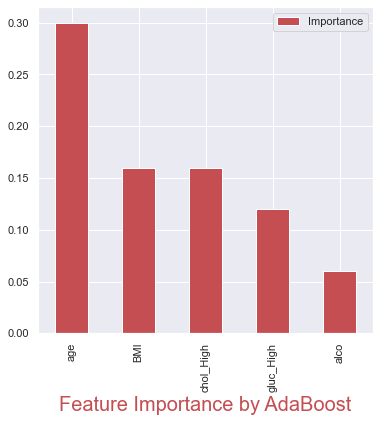

In [80]:
feature_importance = pd.DataFrame({'Importance' : AdaBoostClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'r', figsize = (6, 6))
plt.xlabel("Feature Importance by AdaBoost", color = "r", fontdict= {"fontsize" : 20});

In [81]:
model_ada = AdaBoostClassifier()
model_ada.fit(train_x, train_y)

y_pred_ada = model_ada.predict(test_x)
y_pred_ada_train = model_ada.predict(train_x)
ada_test_as = metrics.accuracy_score(y_pred_ada, test_y)
ada_train_as = metrics.accuracy_score(y_pred_ada_train, train_y)

print(f"Ada test data(accuracy) score {ada_test_as}")
print(f"Ada train data(accuracy) score {ada_train_as}")
print(classification_report(test_y,y_pred_ada))

Ada test data(accuracy) score 0.6250078978960005
Ada train data(accuracy) score 0.631176544926071
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      7952
           1       0.62      0.63      0.62      7875

    accuracy                           0.63     15827
   macro avg       0.63      0.63      0.63     15827
weighted avg       0.63      0.63      0.63     15827



# Extra Trees Classifier

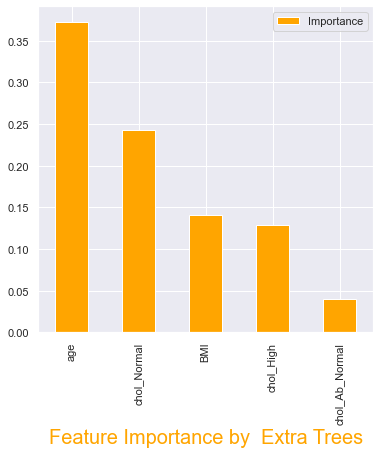

In [82]:
feature_importance = pd.DataFrame({'Importance' : ExtraTreesClassifier().fit(x, y).feature_importances_}, index = x.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = 'orange', figsize = (6, 6))
plt.xlabel("Feature Importance by  Extra Trees", color = "orange", fontdict= {"fontsize" : 20});

In [83]:
model_extra = ExtraTreesClassifier()
model_extra.fit(train_x, train_y)

y_pred_extra = model_extra.predict(test_x)
y_pred_extra_train = model_extra.predict(train_x)
extra_test_as = metrics.accuracy_score(y_pred_extra, test_y)
extra_train_as = metrics.accuracy_score(y_pred_extra_train, train_y)
print(f"ExtraTrees test data(accuracy) score  {extra_test_as}")
print(f"ExtraTrees train data(accuracy) score  {extra_train_as}")
print(classification_report(test_y,y_pred_extra))

ExtraTrees test data(accuracy) score  0.6233019523598913
ExtraTrees train data(accuracy) score  0.6348203378406841
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)

model_lgbm = LGBMClassifier(subsample= 1.0, num_leaves=60, n_estimators=500, min_child_samples=46, max_depth=12, learning_rate=0.01)
model_lgbm.fit(train_x, train_y)

y_pred_lgbm = model_lgbm.predict(test_x)
y_pred_lgbm_train = model_lgbm.predict(train_x)
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, test_y)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, train_y)

y_pred_test = model_lgbm.predict(test_x)
y_pred_train = model_lgbm.predict(train_x)
    
acc_test = accuracy_score(test_y, y_pred_test)
acc_train = accuracy_score(train_y, y_pred_train)

print(f"LGBM test data(accuracy) score {lgbm_test_as}")
print(f"LGBM train data(accuracy) score {lgbm_train_as}")
print(classification_report(test_y,y_pred_lgbm))

LGBM test data(accuracy) score 0.6243760662159601
LGBM train data(accuracy) score 0.6340831543030456
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7952
           1       0.62      0.64      0.63      7875

    accuracy                           0.62     15827
   macro avg       0.62      0.62      0.62     15827
weighted avg       0.62      0.62      0.62     15827



# Plot Decision Tree using the high accuracy score classifier

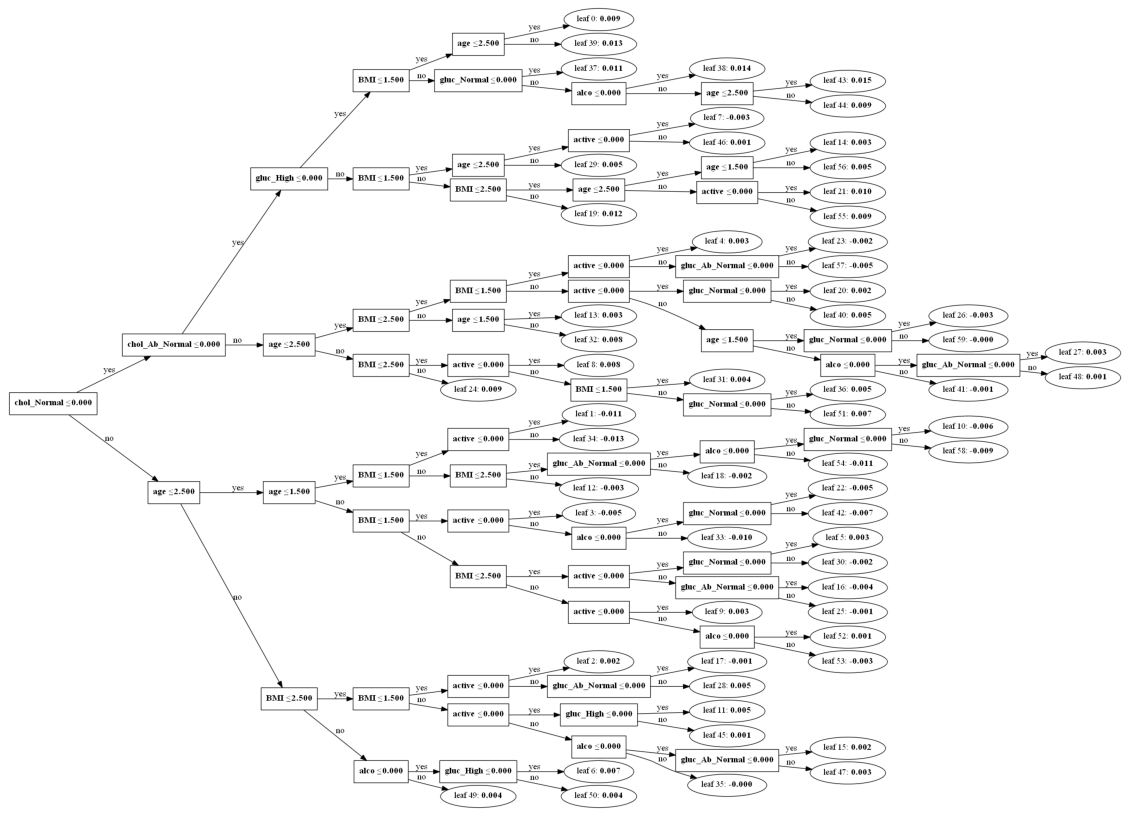

In [85]:
import lightgbm as lgb
lgb.create_tree_digraph(model_lgbm, tree_index=1)
fig2 = plt.figure(figsize=(20, 20))
ax = fig2.subplots()
graph_data=lgb.plot_tree(model_lgbm, tree_index=1, ax=ax)
graph_data.figure.savefig('bar_plot.png')

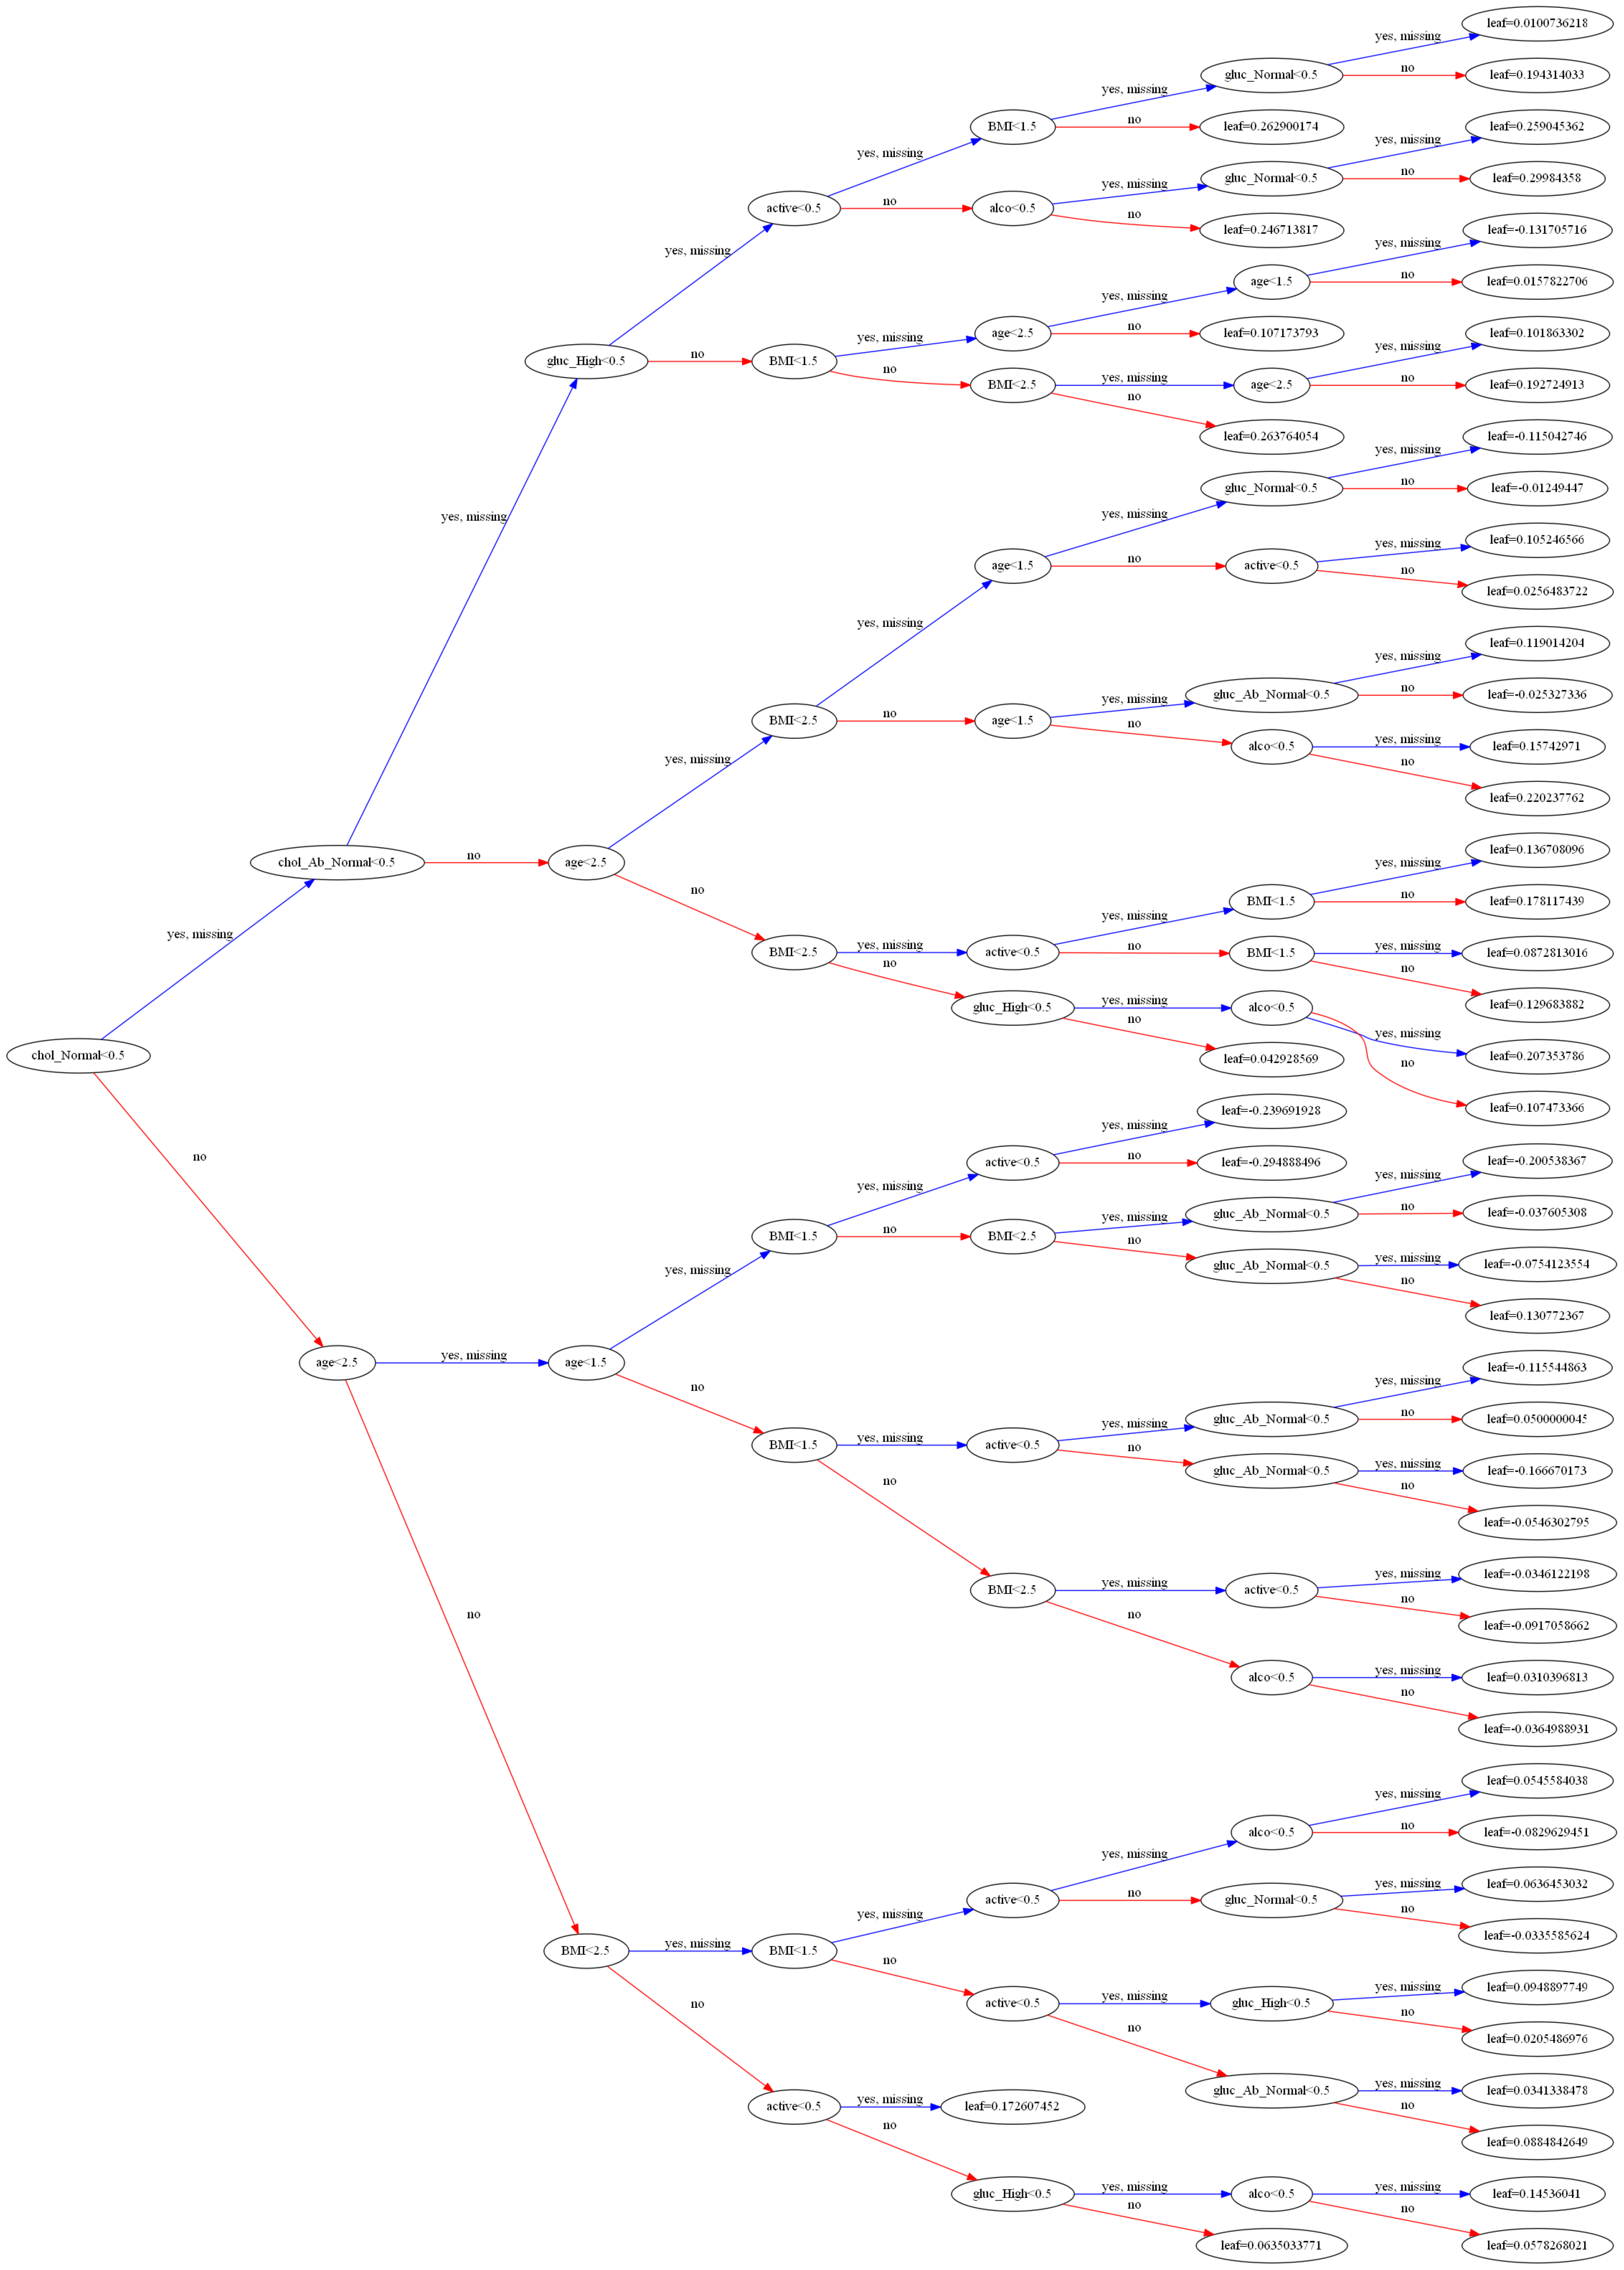

In [86]:
import xgboost as xgb
from xgboost import plot_tree
plot_tree(model_xgb, num_trees=1,rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(100, 90)

# Model Evaluation

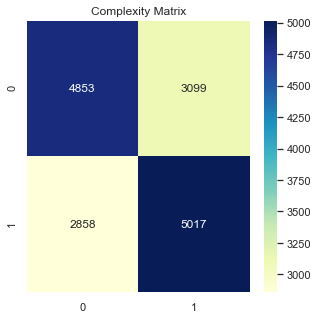

In [87]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred_xgb)
p = sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Complexity Matrix', y=1);

# Probability calculation

In [88]:
import itertools
x=[0,1]
y=[p for p in itertools.product(x, repeat=8)]
w=[p for p in itertools.product([1,2,3], repeat=2)]
a=[]
b=[]
for i in y:
    a.append(list(i))
for i in w:
    b.append(list(i))

p =tuple(b)
r=[]
count=0
for i in range(0,9):
    for j in a:
        r.append(p[i])
        r[count]=r[count]+j
        count=count+1
    
r.sort()
z=np.array(r)

In [89]:
m=model_xgb.predict(z)
n=model_xgb.predict_proba(z)
count=0

for i in m:
    r[count].append(i)
    count=count+1
count=0
for i in n:
    r[count].append(i[1])
    count=count+1
    

In [90]:
df2 = pd.DataFrame(r, columns=['age','BMI', 'alco','active','chol_Normal','chol_Ab_Normal','chol_High',
                               'gluc_Normal','gluc_Ab_Normal','gluc_High','cardio_predict','probability of cardio'])
df2.head(n=5)

age  BMI  alco  active  chol_Normal  chol_Ab_Normal  chol_High  \
0    1    1     0       0            0               0          0   
1    1    1     0       0            0               0          0   
2    1    1     0       0            0               0          0   
3    1    1     0       0            0               0          0   
4    1    1     0       0            0               0          0   

   gluc_Normal  gluc_Ab_Normal  gluc_High  cardio_predict  \
0            0               0          0               0   
1            0               0          1               0   
2            0               1          0               0   
3            0               1          1               0   
4            1               0          0               1   

   probability of cardio  
0               0.386752  
1               0.251151  
2               0.128030  
3               0.072427  
4               0.734379

In [91]:
df2['probability of cardio'].describe()

count    2304.000000
mean        0.528756
std         0.225092
min         0.018891
25%         0.373824
50%         0.554702
75%         0.701949
max         0.982990
Name: probability of cardio, dtype: float64

In [92]:
totaldf2 = df2.loc[df2["probability of cardio"] >= 0.981842 ]
totaldf2.head()

age  BMI  alco  active  chol_Normal  chol_Ab_Normal  chol_High  \
2185    3    3     1       0            0               0          1   

      gluc_Normal  gluc_Ab_Normal  gluc_High  cardio_predict  \
2185            0               0          1               1   

      probability of cardio  
2185                0.98299

# Conclusion : Category with age(55-65) ,BMI(33-40), well-above-normal cholesterol level , well-above-normal glucose level , low active and alcoholic has the highest probability of having cardiovascular disease